In [ ]:
#@title Dependencies

print("Load dependencies - START")
!pip install qrcode > /dev/null 2>&1
!pip install memory_profiler > /dev/null 2>&1

import time
import random
import matplotlib.pyplot as plt
import numpy as np
import qrcode
from PIL import Image
import tracemalloc
import matplotlib.ticker as ticker

print("Load dependencies - END")

Load dependencies - START
Load dependencies - END


In [ ]:
#@title Utils
def medir_tiempo_acceso(lista, indice):
    inicio = time.perf_counter()
    _ = lista[indice]
    fin = time.perf_counter()
    return fin - inicio

In [ ]:
#@title QR

qr_data = "https://drive.google.com/file/d/1pdgeVOANOmLiWza44XPSDaOfomSpym0N/view?usp=sharing"
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=0,
)
qr.add_data(qr_data)
qr.make(fit=True)
qr_img = qr.make_image(fill_color='black', back_color='white')

# Guardar la imagen del código QR
qr_img_path = "codigo_qr.png"
qr_img.save(qr_img_path, dpi=(500, 500))

# Cargar la imagen del código QR con PIL
qr_img_pil = Image.open(qr_img_path)

# Convertir la imagen de PIL a un formato que matplotlib puede manejar
qr_img_np = np.array(qr_img_pil)

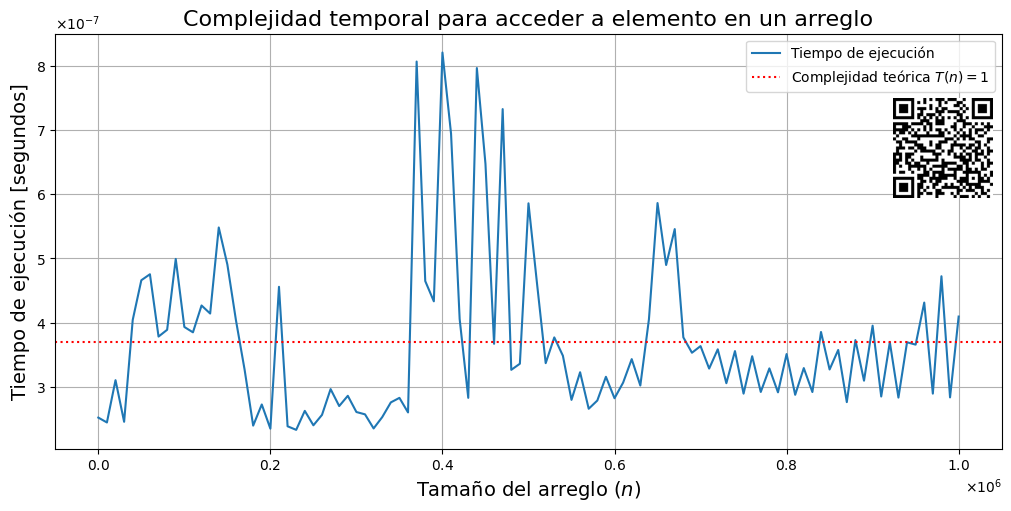

In [ ]:
#@title Complejidad temporal

# Lista de tamaños de lista para probar
tamanos_lista = np.arange(1, 1001000, 10000)

# Inicializar arrays para los tiempos de acceso y el uso de memoria
tiempos_acceso = np.zeros(len(tamanos_lista))
memoria_acceso = np.zeros(len(tamanos_lista))

average = 100

# Medir el tiempo de acceso y el uso de memoria 1000 veces para cada tamaño de lista
for i, n in enumerate(tamanos_lista):
    lista = np.arange(n)
    tiempos_acceso_n = np.zeros(average)
    for j in range(average):
        indice_aleatorio = random.randint(0, n - 1)
        tiempos_acceso_n[j] = medir_tiempo_acceso(lista, indice_aleatorio)
    tiempos_acceso[i] = np.mean(tiempos_acceso_n)

# Calcular la complejidad constante T(n) = 1
complejidad_constante = np.mean(tiempos_acceso)

# Graficar los resultados
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5), constrained_layout=True)

# Primera gráfica: Acceso a un elemento en una lista
ax1.plot(tamanos_lista, tiempos_acceso, label='Tiempo de ejecución')
ax1.axhline(y=complejidad_constante, color='r', linestyle='dotted', label='Complejidad teórica $T(n) = 1$')
ax1.set_xlabel('Tamaño del arreglo ($n$)', fontsize=14)
ax1.set_ylabel('Tiempo de ejecución [segundos]', fontsize=14)
ax1.set_title('Complejidad temporal para acceder a elemento en un arreglo', fontsize=16)
ax1.legend(loc='upper right')
ax1.grid(True)

# Formatear los ejes x e y en notación científica
ax1.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Insertar la imagen del código QR en la gráfica
qr_position = [0.887, 0.59, 0.1, 0.25]
ax_inset = fig.add_axes(qr_position)
ax_inset.imshow(qr_img_np, cmap='gray')
ax_inset.axis('off')

plt.show()

fig.savefig('complejidad_temporal_constante.png', dpi=500)